In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# All plots can be displayed on notebooks:
%matplotlib inline

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-19 15:53:39--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1,4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1,36M  2,12MB/s    in 0,6s    

2022-09-19 15:53:40 (2,12 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

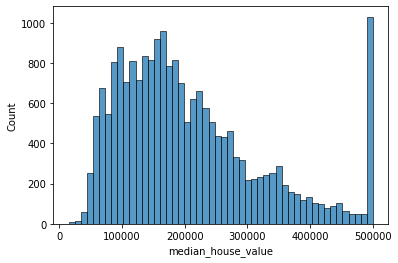

In [4]:
sns.histplot(df['median_house_value'],bins=50)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

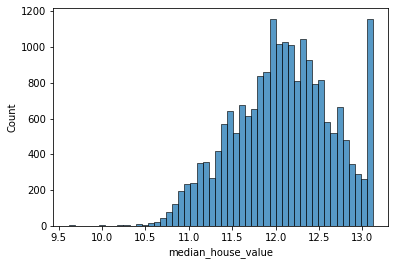

In [5]:
sns.histplot(np.log1p(df.median_house_value),bins=50)

In [6]:
del df['ocean_proximity']

# Q-1: Find a feature with missing values. How many missing values does it have?

In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Q-2 :What's the median (50% percentile) for variable 'population'?

In [8]:
df['population'].median()

1166.0

In [9]:
df.duplicated().any()

False

# Splitting the data

In [10]:
n = len(df)

n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - (n_val + n_test)

In [11]:
n_train,n_val,n_test

(12384, 4128, 4128)

In [12]:
len(df)

20640

In [13]:
# Shuffling data:

In [14]:
idx = np.arange(n)

np.random.seed(42)

np.random.shuffle(idx)

In [15]:
df_shuffled = df.iloc[idx]

In [16]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [17]:
df_train = df_shuffled.iloc[:n_train].copy()

df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()

df_test = df_shuffled.iloc[n_val+n_train:].copy()

In [18]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0
...,...,...,...,...,...,...,...,...,...
10292,-117.81,33.88,19.0,2265.0,283.0,904.0,279.0,9.2327,461300.0
16722,-120.68,35.48,15.0,2608.0,525.0,1351.0,502.0,2.7798,205800.0
11730,-120.91,38.98,13.0,7689.0,1415.0,3264.0,1198.0,3.6530,146800.0
5993,-117.72,34.09,36.0,1473.0,328.0,785.0,299.0,3.2566,151800.0


In [19]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# Q-3 Filling missing values:

In [65]:
# Linear regression code from lessons:

In [20]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [48]:
# First filling with 0:

In [68]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [21]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250
...,...,...,...,...,...,...,...,...
10292,-117.81,33.88,19.0,2265.0,283.0,904.0,279.0,9.2327
16722,-120.68,35.48,15.0,2608.0,525.0,1351.0,502.0,2.7798
11730,-120.91,38.98,13.0,7689.0,1415.0,3264.0,1198.0,3.6530
5993,-117.72,34.09,36.0,1473.0,328.0,785.0,299.0,3.2566


In [21]:
check = ['longitude','latitude','housing_median_age',
         'total_rooms','total_bedrooms','population',
         'households','median_income']

def prepare_X(df,fillna_value):
    df_num = df[check]
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    return X

In [22]:
# First: computing with mean

mean = df_train.total_bedrooms.mean()

X_mean_train = prepare_X(df_train,fillna_value=mean)
w_0_mean,w_mean = train_linear_regression(X_mean_train,y_train)

In [23]:
# Calculating validation:
X_mean_val = prepare_X(df_val,fillna_value=mean)
y_mean_pred_val = w_0_mean + X_mean_val.dot(w_mean)

In [24]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [25]:
np.round(rmse(y_val,y_mean_pred_val),2)

0.33

In [26]:
# Second: computing with 0:

X_null_train = prepare_X(df_train,fillna_value=0)
w_0_null,w_null = train_linear_regression(X_null_train,y_train)

In [27]:
# Calculating validation:

X_null_val = prepare_X(df_val,fillna_value=0)
y_null_pred_val = w_0_null + X_null_val.dot(w_null)

In [28]:
np.round(rmse(y_val,y_null_pred_val),2)

0.33

In [29]:
# No change!

# Q-4 

In [31]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [41]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0,w = train_linear_regression_reg(X_null_train,y_train,r=r)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val,y_null_reg_val),2)
    print(r, w_0.round(2), rmse_val)

0 -11.69 0.33
1e-06 -11.69 0.33
0.0001 -11.69 0.33
0.001 -11.67 0.33
0.01 -11.53 0.33
0.1 -10.27 0.33
1 -4.92 0.33
5 -1.48 0.34
10 -0.79 0.34


In [46]:
# Q-5

In [ ]:
def seeds(df):
    idx_new = np.arange(n)
    for i in seeds:
        np.random.seed(i)
        np.random.shuffle(idx_new)
        

In [61]:
scores = []

for i in [0,1,2,3,4,5,6,7,8,9]:
    
    idx = np.arange(n)
    np.random.seed(i)
    np.random.shuffle(idx)
    
    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values
    
    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)
    
    del df_train['median_house_value']
    del df_test['median_house_value']
    del df_val['median_house_value']
    
    X_null_train = prepare_X(df_train,fillna_value=0)
    w_0,w = train_linear_regression(X_null_train,y_train)
    
    
    X_null_val = prepare_X(df_val,fillna_value=0)
    y_null_reg_val = w_0 + X_null_val.dot(w)
    rmse_val = np.round(rmse(y_val,y_null_reg_val),2)
    
    
    
    scores.append(rmse_val)
    
    #std calculation for rmse scores:
    std_scores = np.std(scores)
    
    
    print(i,w_0,rmse_val,std_scores.round(3))
    
    
    

0 -11.900382138125133 0.34 0.0
1 -11.732757372921618 0.34 0.0
2 -11.806729361193014 0.33 0.005
3 -11.587900347753235 0.34 0.004
4 -11.38947058831824 0.34 0.004
5 -11.447114275587971 0.34 0.004
6 -11.370516351548385 0.35 0.005
7 -12.473448918895018 0.34 0.005
8 -11.80028742979275 0.35 0.006
9 -11.459046830736924 0.34 0.005


In [62]:
np.round(np.std(scores),3)

0.005

# LAST QUESTION

In [72]:
idx_new = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx_new)

df_shuffled = df.iloc[idx_new]

    
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# Mergin training and validation datasets:
df_val_train = pd.concat([df_train,df_val])
df_val_train = df_val_train.reset_index(drop=True)

df_test = df_test.reset_index(drop=True)

y_train_val_orig = df_val_train.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train_val = np.log1p(y_train_val_orig)
y_test = np.log1p(y_test_orig)

del df_val_train['median_house_value']
del df_test['median_house_value']


In [74]:
X_null_train_val = prepare_X(df_val_train,fillna_value=0)

w_0_train_val,w_train_val = train_linear_regression_reg(X_null_train_val,y_train_val,r=0.001)


X_null_test = prepare_X(df_test,fillna_value=0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)


np.round(rmse(y_test,y_null_pred_test),2)


0.35